In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MLOps/Day 3/House Price.csv')

# Encode categorical variables
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Check for missing values and fill if needed
if df.isnull().any().any():
    df = df.fillna(df.median(numeric_only=True))

# Features and Target
X = df.drop('price', axis=1)
y = df['price']


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R2 Score: 0.6494754192267792
RMSE: 1331071.4167895128
Coefficients: [ 519288.13010471   58690.91849754  523153.38284253  348177.1136099
  128115.92797751   89357.64620755  188462.04856579  150570.02827934
  362446.18646599  192786.98589143  266661.04914928 -158183.27016874]
Intercept: 4706527.385321101


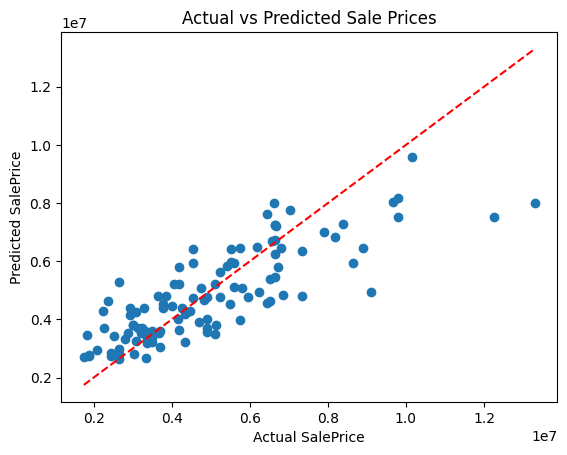

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.show()


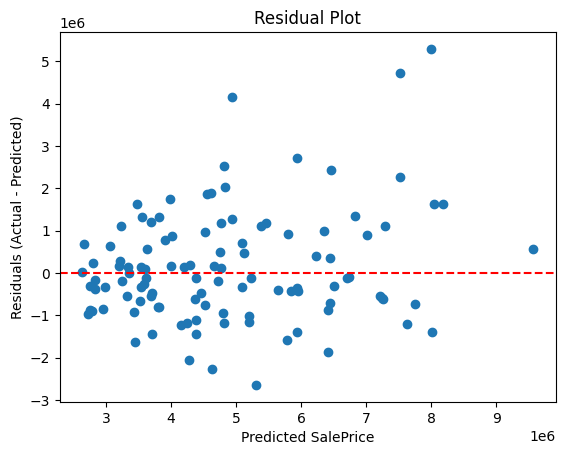

In [11]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()


In [12]:
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {true:.0f}, Predicted: {pred:.0f}")


Actual: 4060000, Predicted: 5203692
Actual: 6650000, Predicted: 7257004
Actual: 3710000, Predicted: 3062829
Actual: 6440000, Predicted: 4559592
Actual: 2800000, Predicted: 3332932
Actual: 4900000, Predicted: 3563081
Actual: 5250000, Predicted: 5645466
Actual: 4543000, Predicted: 6413980
Actual: 2450000, Predicted: 2755832
Actual: 3353000, Predicted: 2668939


In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R2:", scores)
print("Mean R2:", scores.mean())


Cross-validated R2: [ -1.94277003  -5.00707214 -16.22431367 -21.10749485  -5.27173317]
Mean R2: -9.91067677307725


In [14]:
coeffs = pd.Series(model.coef_, index=X.columns)
print(coeffs.sort_values())


furnishingstatus   -158183.270169
bedrooms             58690.918498
guestroom            89357.646208
mainroad            128115.927978
hotwaterheating     150570.028279
basement            188462.048566
parking             192786.985891
prefarea            266661.049149
stories             348177.113610
airconditioning     362446.186466
area                519288.130105
bathrooms           523153.382843
dtype: float64
